## Preprocessing

In [1]:
# Install kerastuner
!pip install -q -U keras-tuner
import keras_tuner as kt

     |████████████████████████████████| 135 kB 4.5 MB/s 
     |████████████████████████████████| 1.6 MB 46.1 MB/s 


In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the noisy variables
application_df = application_df.drop(['STATUS', 'SPECIAL_CONSIDERATIONS'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = application_df['APPLICATION_TYPE'].value_counts().loc[lambda x : x < 500].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = application_df['CLASSIFICATION'].value_counts().loc[lambda x : x < 1800].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dum_df = pd.get_dummies(application_df)
application_dum_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,108590,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5000,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,6692,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,142590,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [12]:
# Split our preprocessed data into our features and target arrays
X = application_dum_df.drop(['IS_SUCCESSFUL'], axis=1)
y = application_dum_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [14]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(X_train_scaled.shape[1],)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32 and 512
  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
  model.add(keras.layers.Dense(units = hp_units, activation = 'sigmoid'))
  model.add(keras.layers.Dense(units = hp_units, activation = 'sigmoid'))
  model.add(keras.layers.Dense(units = hp_units, activation = 'sigmoid'))
  model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                metrics = ['accuracy'])
  
  return model

In [15]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy',
                     max_epochs = 10,
                     factor = 3,
                     directory = 'deep-learning-challenge',
                     project_name = 'AlphabetSoupCharity_Optimization')

In [16]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 5)

In [17]:
tuner.search(X_train_scaled, y_train, epochs = 20, validation_split = 0.2, callbacks = [stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 25s]
val_accuracy: 0.7331389784812927

Best val_accuracy So Far: 0.7379980683326721
Total elapsed time: 00h 09m 40s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 416 and the optimal learning rate for the optimizer
is 0.001.



In [18]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_scaled, y_train, epochs = 200, validation_split = 0.2)

Epoch 1/200
644/644 [==============================] - 7s 10ms/step - loss: 0.6150 - accuracy: 0.6855 - val_loss: 0.5724 - val_accuracy: 0.7259
Epoch 2/200
644/644 [==============================] - 6s 10ms/step - loss: 0.5785 - accuracy: 0.7182 - val_loss: 0.5779 - val_accuracy: 0.7219
Epoch 3/200
644/644 [==============================] - 6s 10ms/step - loss: 0.5691 - accuracy: 0.7217 - val_loss: 0.5563 - val_accuracy: 0.7353
Epoch 4/200
644/644 [==============================] - 7s 10ms/step - loss: 0.5630 - accuracy: 0.7256 - val_loss: 0.5670 - val_accuracy: 0.7250
Epoch 5/200
644/644 [==============================] - 6s 10ms/step - loss: 0.5601 - accuracy: 0.7281 - val_loss: 0.5519 - val_accuracy: 0.7357
Epoch 6/200
644/644 [==============================] - 6s 10ms/step - loss: 0.5586 - accuracy: 0.7279 - val_loss: 0.5576 - val_accuracy: 0.7357
Epoch 7/200
644/644 [==============================] - 8s 12ms/step - loss: 0.5583 - accuracy: 0.7275 - val_loss: 0.5581 - val_accuracy:

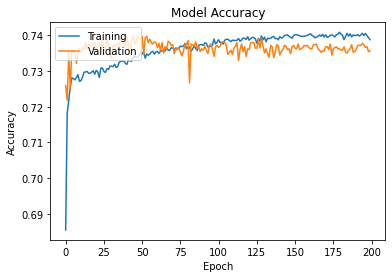

In [19]:
# Plot the accuracy of the model during training
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

In [20]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 7.5952 - accuracy: 0.7278 - 1s/epoch - 4ms/step
Loss: 7.595183372497559, Accuracy: 0.7278134226799011


In [22]:
# Export our model to HDF5 file
model.save("AlphabetSoupCharity_Optimization.h5")